In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline 

In [36]:
def load_datasets(filename, features_list, target_column):
    df = pd.read_csv(filename).dropna()
    X, y = df[features_list].to_numpy(), df[target_column].to_numpy()
    return X, y

In [37]:
def split_datasets(X, y, test_size = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [38]:
def plot_data(X_train, X_test, y_train, y_test):
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [39]:
def normalize(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X_new = (X - mean)/std
    return X_new, mean, std

In [40]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [41]:
def hypothesis(X, theta):
    h_theta = np.dot(X, theta)
    return h_theta

In [42]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    J = sum((hypothesis(X, theta) - y)**2)/(2*m)
    return J

In [43]:
def derivative(X, y, theta):
    m = X.shape[0]
    d_theta = np.dot(hypothesis(X,theta) - y, X) / m
    return d_theta

In [44]:
def gradient_descent(X, y, theta, alpha, max_iter):
    J_history = [cost_function(X, y, theta)]
    for i in range(max_iter):
        delta = derivative(X, y, theta)
        theta = theta - alpha * delta
        J_history.append(cost_function(X, y, theta))
    return theta, J_history

In [45]:
def plot_J(X, y):
    '''
    Функція для виведення графіків штрафної функції для різних значень параметрів на вхідних даних
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    '''
    theta_0 = np.linspace(-20, 20, 100)
    theta_1 = np.linspace(-5, 10, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

## Основний код програми

Отримання датасетів та видрук їх параметрів.

In [46]:
X, y = load_datasets('burrito.csv', ["population"], "profit")
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(97, 1), y=(97,)


Розбиття датасету на частини:

In [47]:
test_size = 0.2 #0.0
X_train, X_test, y_train, y_test = split_datasets(X, y, test_size)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(77, 1), y=(77,)
Test set: X=(20, 1), y=(20,)


Відображення тренувальних і тестових даних на графіку (для 1 змінної)

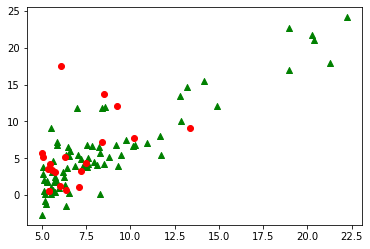

In [48]:
plot_data(X_train, X_test, y_train, y_test)

Підготовка тренувальних даних (додавання 0-колонки з одиницями). Ініціалізація параметрів регресії (0, 0): 

In [49]:
X_train_normalized, mean, std = normalize(X_train)
X = prepare_X(X_train_normalized)
theta = np.array([1 for _ in range(X.shape[1])])

Для спрощення записів аліас для вектора передбачуваних значень

In [50]:
y = y_train[:]

У випадку використання ВСІХ даних для тренування (test_size=0.0), штрафна функція має повернути величину близьку до 32.072.

In [51]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (77, 2)
y: (77,)
23.82108173580625


Налаштування гіперпараметрів регресії: швидкості навчання та кількості ітерацій.

In [52]:
alpha = 0.001
num_iters = 1500

Запуск градієнтного спуску та видрук знайдених оптимальних значень на екран. У випадку використання всіх даних для тренування, результати будуть близькі до Theta 0: 5.84; Theta 1: 4.59

In [53]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))

Theta 0: 4.832096070997791; Theta 1: 4.18109958347313


Відображення штрафної функції як функції від thetha0, thetha1.

C:\Users\MarKson\AppData\Local\Temp\ipykernel_17476\4287163605.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


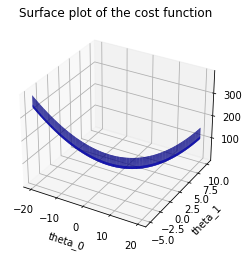

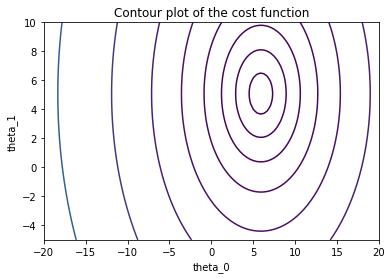

In [54]:
plot_J(X, y)

Відображення знайденої апроксимації разом із тренувальними даними.

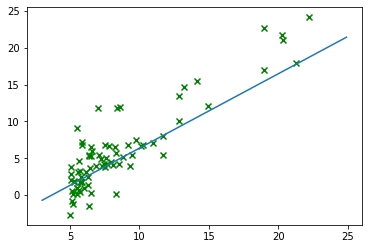

In [55]:
x = np.arange(3, 25, 0.1)
h = new_theta[0] + new_theta[1]*(x-mean)/std

plt.plot(x, h)
plt.scatter(X_train[:, 0], y_train, marker='x', c='green')

plt.show()

Оцінка похибки апроксимації на тестових даних (test_size має бути більше 0.0 та менше 1.0).

In [56]:
####################
# Нормалізувати тестовий датасет, використовуючи mean, std з тренувального
####################
X_test_proc = (X_test - mean)/std
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100
res = pd.DataFrame({'X' : X_test.ravel(), 'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})

print(res)
print(cost_function(X_test_proc, y_test, new_theta))

          X  y_actual    y_pred         err
0    6.0062   1.27840  2.345322   83.457570
1    6.3557   0.67861  2.698543  297.657431
2    7.2259   3.34110  3.578009    7.090751
3    7.0931   1.04630  3.443795  229.140305
4    9.2482  12.13400  5.621843   53.668677
5    6.1101  17.59200  2.450328   86.071351
6    7.4764   4.34830  3.831176   11.892546
7    5.4069   0.55657  1.739640  212.564487
8    6.3261   5.18750  2.668628   48.556570
9   10.2360   7.77540  6.620161   14.857616
10   5.0365   5.70140  1.365296   76.053318
11   5.6063   3.39280  1.941163   42.785799
12   8.4084   7.22580  4.773100   33.943640
13   5.4901   4.26300  1.823726   57.219655
14   5.7340   3.15510  2.070223   34.384864
15   5.3794   3.51290  1.711847   51.269682
16   5.4369   0.61705  1.769960  186.842170
17   8.5186  13.66200  4.884474   64.247739
18   5.0702   5.13370  1.399355   72.741786
19  13.3940   9.05510  9.811788    8.356481
10.55587528735912
